# Polynomial regression - overfitting and underfitting

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))

f = lambda x: x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples,1)

f(X).shape, X.shape

((100, 1), (100, 1))

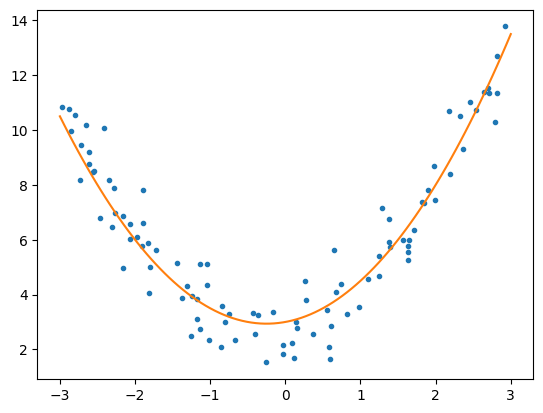

In [9]:

x = np.linspace(-3,3,100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))


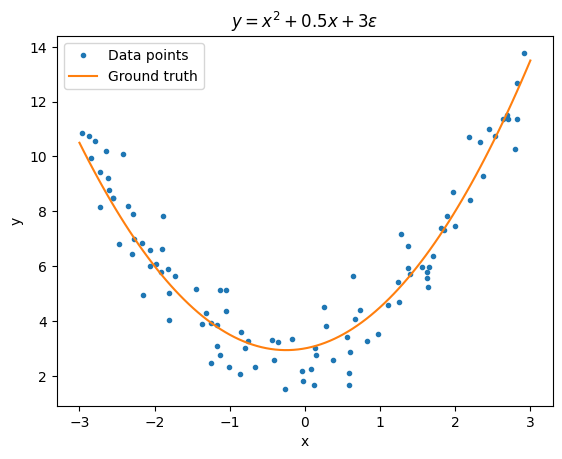

In [13]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, '.', label="Data points")
    x = np.linspace(-3,3,samples).reshape(-1,1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title= r"$y = x^2+0.5x+3\epsilon$", xlabel="x", ylabel="y")
    ax.legend()

    return ax

draw_data();


## Polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)

polynomial_features = polynomial_instance.fit_transform(X) 
polynomial_features[:5], X[:5]

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]))

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y)
model.coef_

array([[0.43366893, 1.06456263]])

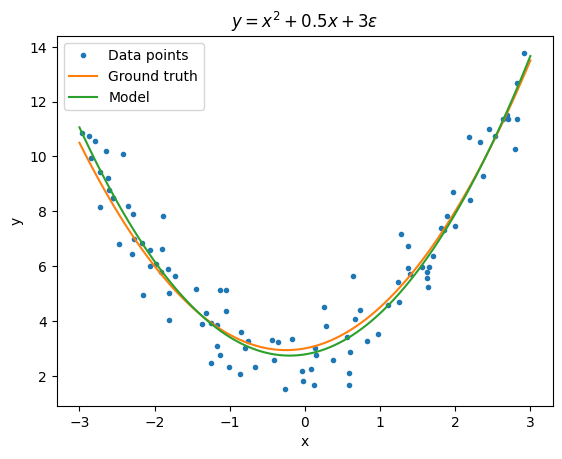

In [21]:
x = np.linspace(-3,3, samples).reshape(-1,1)
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend()

## Underfitting

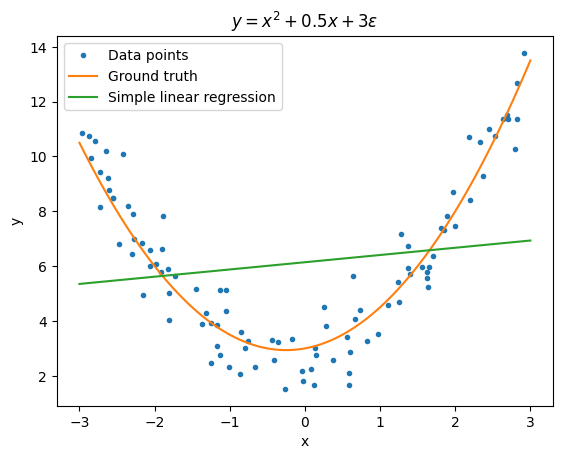

In [26]:

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label = "Simple linear regression")
ax.legend();

## Overfitting

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted, the model is to complex'), (1.0, 15.0)]

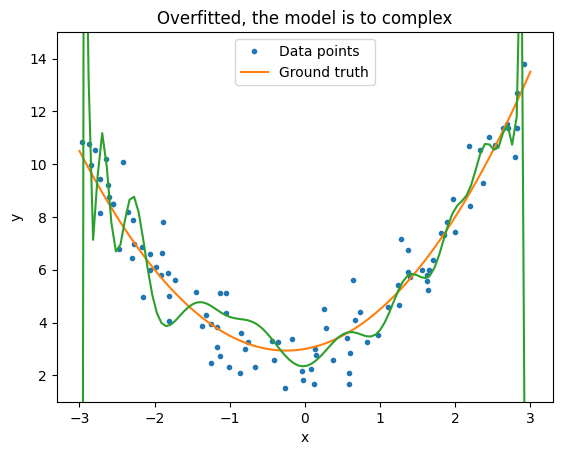

In [36]:
polynomial_instance = PolynomialFeatures(30, include_bias=False)
X_features = polynomial_instance.fit_transform(X)

print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance.transform(x)
y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title = "Overfitted, the model is to complex", ylim = [1,15])

## Choose a model

In [40]:
np.random.seed(42)


samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5 * x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape


((10000, 1), (10000, 1))

## Train|val|test split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## Elbow

In [46]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1, 100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

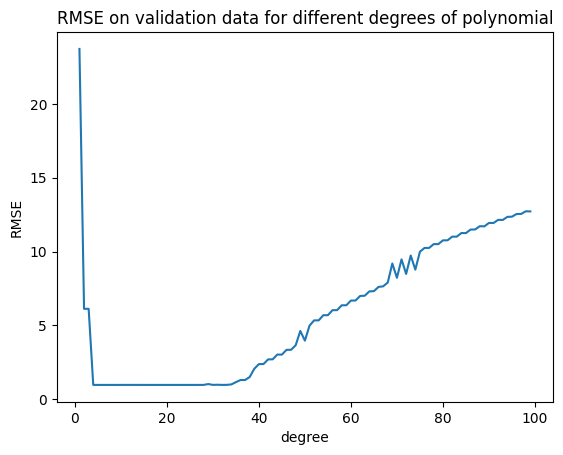

In [47]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

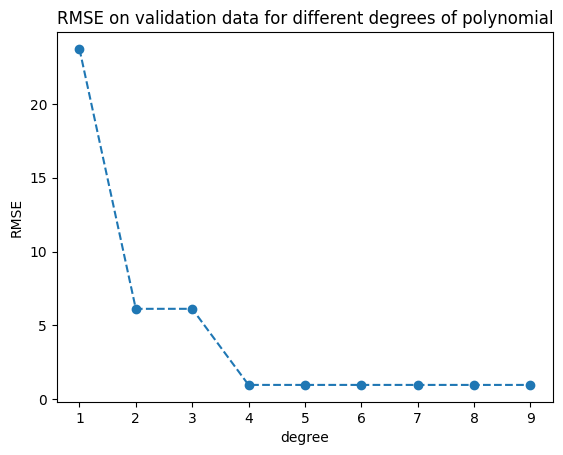

In [50]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")